In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion_mnist= keras.datasets.fashion_mnist

In [5]:
(x_train, y_train),(x_test,y_test)= fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

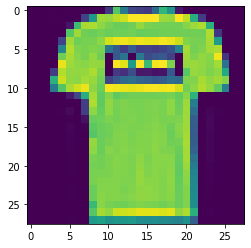

In [9]:
plt.imshow(x_train[1])

In [10]:
x_train= x_train/255.0
x_test= x_test/255.0

In [11]:
x_train[0].shape

(28, 28)

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_train= x_train.reshape(len(x_train),28,28,1)
x_test= x_test.reshape(len(x_test),28,28,1)

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
from tensorflow.keras import datasets, layers, models
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(20, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8057 - accuracy: 0.7319
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5442 - accuracy: 0.8159
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4928 - accuracy: 0.8305
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4659 - accuracy: 0.8386
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4488 - accuracy: 0.8454
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4355 - accuracy: 0.8489
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4264 - accuracy: 0.8525
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4189 - accuracy: 0.8557
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4121 - accuracy: 0.8562
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.405

In [28]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4401 - accuracy: 0.8438


[0.4401378929615021, 0.8438000082969666]

In [32]:
y_predicted= ann.predict(x_test)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)

In [33]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[784,   1,  14,  54,   4,   1, 129,   0,  13,   0],
       [  2, 954,   5,  31,   3,   0,   3,   0,   2,   0],
       [ 16,   3, 722,  10, 132,   2, 106,   0,   9,   0],
       [ 21,  11,  13, 875,  32,   1,  42,   0,   5,   0],
       [  0,   2,  97,  38, 747,   1, 105,   0,  10,   0],
       [  0,   0,   0,   1,   0, 933,   0,  39,   3,  24],
       [116,   1, 112,  42,  85,   2, 619,   0,  23,   0],
       [  0,   0,   0,   0,   0,  40,   0, 912,   0,  48],
       [  3,   1,   9,   8,   2,   4,  23,   6, 944,   0],
       [  0,   0,   0,   0,   0,  15,   0,  36,   1, 948]], dtype=int32)>